# Respuestas a preguntas

Después de haber realizado el tratamiento de datos, los modelos de arbolitos y el análisis escogiendo el modelo con el mayor porcentaje de precisión que es el modelo 5 que tiene 80,9% de "accuracy" puedo proceder a responder las preguntas:

# 1.   
¿Cuáles son las variables que mejor explican la asistencia o no asistencia a eventos culturales? Explique.

Elijo las variables del nodo inicial y de los nodos parentales que destacan en el módulo de evaluación ya que usualmente son los que en más se concentra para hacer predicciones, también son las respuestas más tocadas/que más contribuyen en la encuesta, de estas divisiones parentales se desprenderán el resto de variables más pequeñas y específicas, por esto creo que son las que mejor explican la asistencia o no asistencia:

- Calidad del evento: 100% de la muestra / nodo inicial
- Número de meses que hace que llegó a Bogotá.
- Estado civil
- e Ingresos

igualmente podemos destacar los resultados del resumen del árbol en que nos dice el nivel de importancia de las variables:

```

Variable importance
calidadinfoeventos       meses_bogota        estadocivil           ingresos
                20                 19                 18                 15
              edad              ocupa            estrato               sexo
                14                 11                  4                  1
```

# 2.

2.   En el mejor modelo obtenido: ¿Cómo es la matriz de confusión? Por favor realice la explicación detallada sobre la capacidad predictiva de modelo.

En la matriz de confusión de árbol donde (según lo que vimos en clase) las columnas son la realidad y las filas el pronóstico;

```
Confusion Matrix and Statistics

          Reference
Prediction NO SI
        NO 88 18
        SI 20 73
```

- Donde el modelo predecía que no asistirían a eventos 88 personas efectivamente no asistieron, le atinó.
- Donde el modelo predecía que asistirían a eventos 20 personas no asistieron, el modelo no acertó.
- Donde el modelo predecía que no asistirían a eventos 18 personas si asistieron, se equivocó.
- Donde el modelo predecía que asistirían a eventos 73 personas efectivamente si asistieron, acertó.


```
Accuracy : 0.809           
95% CI : (0.7475, 0.8612)
```
Gracias al porcentaje de precisión (accuracy) igualmente nos deja saber qué tran preciso es el árbol en términos de predicción, el 0.809 significa que si hacemos 100 predicciones, vamos a acertar en al rededor de 80 de ellas, también en que si hacemos 100 árboles 95 de ellos tendrán precisión en el intervalo del 74 al 86%, básicamente, es un buen modelo que le atina a la polla de si asiste a eventos culturales distritales o no la gran mayoría de las veces.

# 3

3.   Por favor analice las tres principales reglas obtenidas por el modelo para explicar el perfil de las personas que no asisten a actividades culturales en Bogotá, en términos de probabilidad.


Para llegar a un equilibrio desde mi punto de vista entre la probabilidad de ocurrencia y la cantidad de muestra he tratado de elegir las que tienen el mayor alcance en las personas y que a su vez tienen mayor probabilidad de ocurrencia, hay que tener en cuenta que esto es a mi concepto y por ojímetro (tengo cuidado de leerla de abajo hacia arriba):



*   La que creo que es la mejor y más equilibrada es la regla número 59, probabilidad del SI 76% y del NO 24% con un tamaño de muestra del 20% donde si lleva menos de 31.5 meses en Bogotá, se encuentra casado/a con hijos, soltero/a sin hijos, en unión libre sin hijos, tiene ingresos de 1´475.435 a 2´213.151, de 2´950.869 a 3´688.585, de 737.718 a 1´475.434, o de menos de 737.717, se encuentra en un rango de edad entre 23 y 40, y la calidad del evento es aceptable, buena, excelente o regular, entonces elegiría que SI.


> 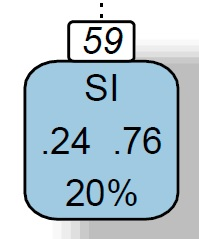


*   La regla número 2 donde si la ciudadanía que asiste tiene la percepción de que fue deficiente entonces el 85% del 12% de la muestra no asistiría.

> 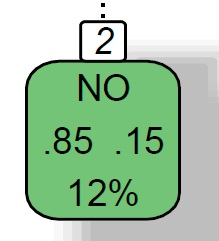

*   Finalmente, la regla número 15 donde si tiene ingresos de 3´688.586 o más, de 2´213.152 a 2.950.868, o no percibe ingresos, esta entre los 23 y 40 años y el evento es aceptable, bueno, excelente o regular entonces tiene una altísima probabilidad de asistir del 95% que aplica para el 8% de la muestra.

> 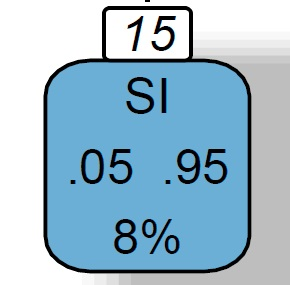

# Paquete pesado caret

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# El resto de bibliotecas

In [ ]:
install.packages("tidyverse")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("readr")
install.packages("rattle") #Esta biblioteca permite correr fancyRpartPlot que da un árbol más bonito

library(tidyverse)
library(rpart)
library(rpart.plot)
library(readr)
library(rattle)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Carga de datos

In [ ]:
arb<-read.csv2("/content/bogota cultural.csv")
arb$ocupa[arb$ocupa=="1"] = NA
arb<-na.omit(arb)
head(arb)

,asisteactividad,meses_bogota,estrato,sexo,edad,ingresos,estadocivil,educa,ocupa,calidadinfoeventos
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NO,21,2,MASCULINO,15-22,MENOS DE 737.717,SOLTERO (A) SIN HIJOS,PROFESIONAL,ESTUDIO,ACEPTABLE
2,SI,30,3,MASCULINO,23-40,DE 737.718 A 1´475.434,SOLTERO (A) CON HIJOS,POSTGRADO,TRABAJO,DEFICIENTE
3,NO,32,3,FEMENINO,23-40,DE 1´475.435 A 2´213.151,SOLTERO (A) SIN HIJOS,TECNOLOGO,ESTUDIO Y TRABAJO,BUENA
4,SI,5,2,MASCULINO,15-22,MENOS DE 737.717,SOLTERO (A) SIN HIJOS,SECUNDARIA,TRABAJO,ACEPTABLE
5,SI,32,2,MASCULINO,23-40,DE 1´475.435 A 2´213.151,UNIÓN LIBRE CON HIJOS,PROFESIONAL,TRABAJO,REGULAR
6,SI,10,3,MASCULINO,23-40,DE 737.718 A 1´475.434,SOLTERO (A) SIN HIJOS,TÉCNICO,ESTUDIO Y TRABAJO,REGULAR


# Tratamiento de datos

In [ ]:
arb$asisteactividad<-as.factor(arb$asisteactividad)
arb$sexo<-as.factor(arb$sexo)
arb$edad<-as.factor(arb$edad)
arb$ingresos<-as.factor(arb$ingresos)
arb$estadocivil<-as.factor(arb$estadocivil)
arb$educa<-as.factor(arb$educa)
arb$ocupa<-as.factor(arb$ocupa)
arb$calidadinfoeventos<-as.factor(arb$calidadinfoeventos)


summary(arb)
head(arb)

 asisteactividad  meses_bogota      estrato             sexo           edad    
 NO:429          Min.   : 1.00   Min.   :1.000   FEMENINO :468   15-22   :315  
 SI:435          1st Qu.:18.00   1st Qu.:2.000   MASCULINO:396   23-40   :381  
                 Median :21.00   Median :3.000                   41-55   : 93  
                 Mean   :23.99   Mean   :3.038                   56-70   : 63  
                 3rd Qu.:29.25   3rd Qu.:3.000                   71 O MÁS: 12  
                 Max.   :75.00   Max.   :6.000                                 
                                                                               
                     ingresos                   estadocivil 
 3´688.586 O MÁS         : 42   SOLTERO (A) SIN HIJOS :513  
 DE 1´475.435 A 2´213.151:138   CASADO (A) CON HIJOS  :123  
 DE 2´213.152 A 2.950.868: 57   SOLTERO (A) CON HIJOS : 75  
 DE 2´950.869 A 3´688.585: 60   UNIÓN LIBRE CON HIJOS : 57  
 DE 737.718 A 1´475.434  :276   CASADO (A) SIN HIJOS  :

,asisteactividad,meses_bogota,estrato,sexo,edad,ingresos,estadocivil,educa,ocupa,calidadinfoeventos
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,NO,21,2,MASCULINO,15-22,MENOS DE 737.717,SOLTERO (A) SIN HIJOS,PROFESIONAL,ESTUDIO,ACEPTABLE
2,SI,30,3,MASCULINO,23-40,DE 737.718 A 1´475.434,SOLTERO (A) CON HIJOS,POSTGRADO,TRABAJO,DEFICIENTE
3,NO,32,3,FEMENINO,23-40,DE 1´475.435 A 2´213.151,SOLTERO (A) SIN HIJOS,TECNOLOGO,ESTUDIO Y TRABAJO,BUENA
4,SI,5,2,MASCULINO,15-22,MENOS DE 737.717,SOLTERO (A) SIN HIJOS,SECUNDARIA,TRABAJO,ACEPTABLE
5,SI,32,2,MASCULINO,23-40,DE 1´475.435 A 2´213.151,UNIÓN LIBRE CON HIJOS,PROFESIONAL,TRABAJO,REGULAR
6,SI,10,3,MASCULINO,23-40,DE 737.718 A 1´475.434,SOLTERO (A) SIN HIJOS,TÉCNICO,ESTUDIO Y TRABAJO,REGULAR


# Modelos varios

# Modelo 1: Accuracy : 0.7181 , entrenamiento 70%, comprobación 30%

In [ ]:
set.seed(sample(1:1000000,100202,replace=F))
arb_ent<-sample_frac(arb,.7)
arb_com<-sample_frac(arb,.3)
summary(arb_ent)
summary(arb_com)


 asisteactividad  meses_bogota      estrato             sexo           edad    
 NO:293          Min.   : 1.00   Min.   :1.000   FEMENINO :317   15-22   :225  
 SI:312          1st Qu.:18.00   1st Qu.:2.000   MASCULINO:288   23-40   :266  
                 Median :21.00   Median :3.000                   41-55   : 66  
                 Mean   :23.61   Mean   :3.045                   56-70   : 43  
                 3rd Qu.:29.00   3rd Qu.:3.000                   71 O MÁS:  5  
                 Max.   :75.00   Max.   :6.000                                 
                                                                               
                     ingresos                   estadocivil 
 3´688.586 O MÁS         : 32   SOLTERO (A) SIN HIJOS :371  
 DE 1´475.435 A 2´213.151: 89   CASADO (A) CON HIJOS  : 77  
 DE 2´213.152 A 2.950.868: 44   SOLTERO (A) CON HIJOS : 50  
 DE 2´950.869 A 3´688.585: 37   UNIÓN LIBRE CON HIJOS : 43  
 DE 737.718 A 1´475.434  :187   CASADO (A) SIN HIJOS  :

 asisteactividad  meses_bogota      estrato             sexo           edad    
 NO:130          Min.   : 1.00   Min.   :1.000   FEMENINO :134   15-22   : 90  
 SI:129          1st Qu.:18.00   1st Qu.:2.000   MASCULINO:125   23-40   :122  
                 Median :21.00   Median :3.000                   41-55   : 23  
                 Mean   :23.24   Mean   :2.942                   56-70   : 20  
                 3rd Qu.:28.00   3rd Qu.:3.000                   71 O MÁS:  4  
                 Max.   :75.00   Max.   :6.000                                 
                                                                               
                     ingresos                  estadocivil 
 3´688.586 O MÁS         :13   SOLTERO (A) SIN HIJOS :156  
 DE 1´475.435 A 2´213.151:42   CASADO (A) CON HIJOS  : 35  
 DE 2´213.152 A 2.950.868:11   SOLTERO (A) CON HIJOS : 21  
 DE 2´950.869 A 3´688.585:13   UNIÓN LIBRE CON HIJOS : 17  
 DE 737.718 A 1´475.434  :85   SEPARADO (A) CON HIJOS:  8  


In [ ]:
tree1<-rpart(formula=asisteactividad~ .-educa, data=arb_ent)
tree1

n= 605 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 605 293 SI (0.4842975 0.5157025)  
     2) edad=15-22,41-55,56-70 334 130 NO (0.6107784 0.3892216)  
       4) calidadinfoeventos=DEFICIENTE 47   8 NO (0.8297872 0.1702128) *
       5) calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR 287 122 NO (0.5749129 0.4250871)  
        10) meses_bogota>=41 52  11 NO (0.7884615 0.2115385) *
        11) meses_bogota< 41 235 111 NO (0.5276596 0.4723404)  
          22) estadocivil=CASADO (A) CON HIJOS,SOLTERO (A) CON HIJOS,SOLTERO (A) SIN HIJOS,UNIÓN LIBRE CON HIJOS,UNIÓN LIBRE SIN HIJOS,VIUDO (A) CON HIJOS 226 102 NO (0.5486726 0.4513274)  
            44) meses_bogota>=3.5 211  90 NO (0.5734597 0.4265403)  
              88) estadocivil=UNIÓN LIBRE CON HIJOS,UNIÓN LIBRE SIN HIJOS 9   0 NO (1.0000000 0.0000000) *
              89) estadocivil=CASADO (A) CON HIJOS,SOLTERO (A) CON HIJOS,SOLTERO (A) SIN HIJOS,VIUDO (A) CON HIJOS 202  90 NO (0.5544554 0.4455446

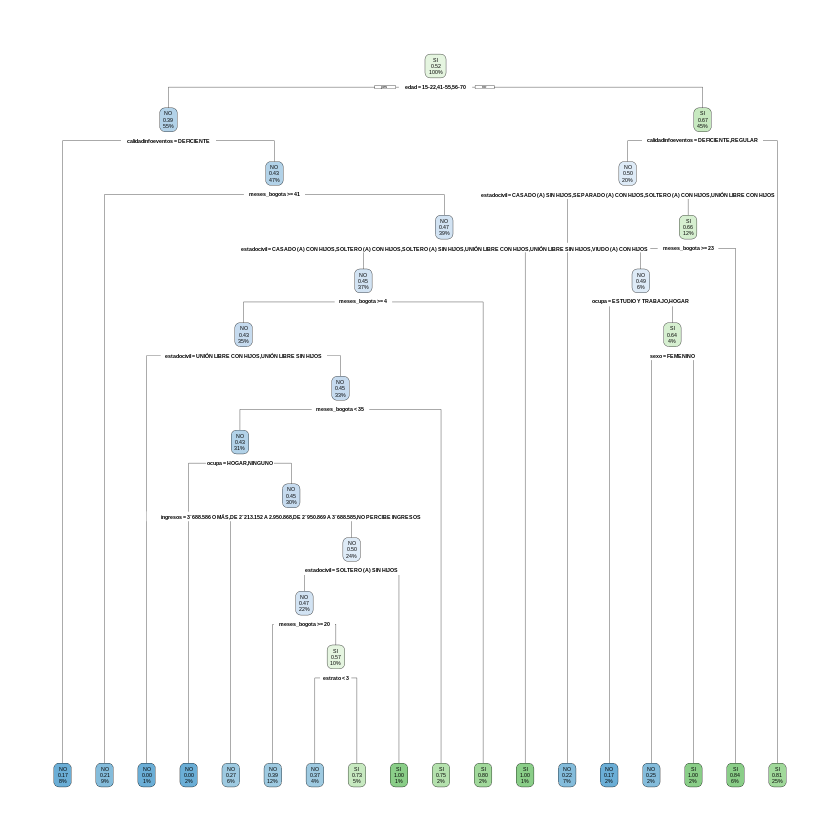

In [ ]:
rpart.plot(tree1)

In [ ]:
pdf("modelo1.pdf")
rpart.plot(tree1)
dev.off()

png 
  2

In [ ]:
summary(tree1)

Call:
rpart(formula = asisteactividad ~ . - educa, data = arb_ent)
  n= 605 

          CP nsplit rel error    xerror       xstd
1 0.25255973      0 1.0000000 1.0000000 0.04195327
2 0.04266212      1 0.7474403 0.7576792 0.04046044
3 0.01535836      3 0.6621160 0.6723549 0.03933851
4 0.01365188      7 0.6006826 0.6996587 0.03973394
5 0.01023891     10 0.5529010 0.6723549 0.03933851
6 0.01000000     17 0.4539249 0.6177474 0.03843943

Variable importance
       estadocivil       meses_bogota               edad calidadinfoeventos 
                20                 19                 18                 14 
          ingresos              ocupa            estrato               sexo 
                11                  9                  5                  4 

Node number 1: 605 observations,    complexity param=0.2525597
  predicted class=SI  expected loss=0.4842975  P(node) =1
    class counts:   293   312
   probabilities: 0.484 0.516 
  left son=2 (334 obs) right son=3 (271 obs)
  Primar

In [ ]:
pron<-predict(tree1,newdata=arb_com,type="class")
head(pron)

1  2  3  4  5  6 
NO SI NO NO SI NO 
Levels: NO SI

In [ ]:
confusionMatrix(pron,arb_com[["asisteactividad"]])

Confusion Matrix and Statistics

          Reference
Prediction NO SI
        NO 93 36
        SI 37 93
                                          
               Accuracy : 0.7181          
                 95% CI : (0.6591, 0.7721)
    No Information Rate : 0.5019          
    P-Value [Acc > NIR] : 1.172e-12       
                                          
                  Kappa : 0.4363          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7154          
            Specificity : 0.7209          
         Pos Pred Value : 0.7209          
         Neg Pred Value : 0.7154          
             Prevalence : 0.5019          
         Detection Rate : 0.3591          
   Detection Prevalence : 0.4981          
      Balanced Accuracy : 0.7182          
                                          
       'Positive' Class : NO              
                                    

# Modelo 2: Accuracy : 0.7399 , entrenamiento 80%, comprobación 20%

In [ ]:
set.seed(sample(1:1000000,100202,replace=F))
arb_ent<-sample_frac(arb,.8)
arb_com<-sample_frac(arb,.2)
summary(arb_ent)
summary(arb_com)


 asisteactividad  meses_bogota      estrato             sexo           edad    
 NO:344          Min.   : 1.00   Min.   :1.000   FEMENINO :376   15-22   :254  
 SI:347          1st Qu.:18.00   1st Qu.:2.000   MASCULINO:315   23-40   :296  
                 Median :21.00   Median :3.000                   41-55   : 77  
                 Mean   :24.03   Mean   :3.049                   56-70   : 54  
                 3rd Qu.:30.00   3rd Qu.:3.000                   71 O MÁS: 10  
                 Max.   :75.00   Max.   :6.000                                 
                                                                               
                     ingresos                   estadocivil 
 3´688.586 O MÁS         : 34   SOLTERO (A) SIN HIJOS :411  
 DE 1´475.435 A 2´213.151:112   CASADO (A) CON HIJOS  :101  
 DE 2´213.152 A 2.950.868: 47   SOLTERO (A) CON HIJOS : 58  
 DE 2´950.869 A 3´688.585: 52   UNIÓN LIBRE CON HIJOS : 47  
 DE 737.718 A 1´475.434  :214   SEPARADO (A) CON HIJOS:

 asisteactividad  meses_bogota      estrato             sexo          edad   
 NO:91           Min.   : 1.00   Min.   :1.000   FEMENINO :94   15-22   :55  
 SI:82           1st Qu.:18.00   1st Qu.:2.000   MASCULINO:79   23-40   :87  
                 Median :21.00   Median :3.000                  41-55   :20  
                 Mean   :23.51   Mean   :2.977                  56-70   : 9  
                 3rd Qu.:29.00   3rd Qu.:3.000                  71 O MÁS: 2  
                 Max.   :75.00   Max.   :6.000                               
                                                                             
                     ingresos                  estadocivil
 3´688.586 O MÁS         : 9   SOLTERO (A) SIN HIJOS :95  
 DE 1´475.435 A 2´213.151:24   CASADO (A) CON HIJOS  :21  
 DE 2´213.152 A 2.950.868:13   SOLTERO (A) CON HIJOS :20  
 DE 2´950.869 A 3´688.585:14   UNIÓN LIBRE CON HIJOS :18  
 DE 737.718 A 1´475.434  :50   SEPARADO (A) CON HIJOS: 7  
 MENOS DE 737.717     

In [ ]:
tree1<-rpart(formula=asisteactividad~ .-educa, data=arb_ent)
tree1

n= 691 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 691 344 SI (0.49782923 0.50217077)  
     2) edad=15-22,41-55,56-70,71 O MÁS 395 155 NO (0.60759494 0.39240506)  
       4) ocupa=HOGAR 38   3 NO (0.92105263 0.07894737) *
       5) ocupa=ESTUDIO,ESTUDIO Y TRABAJO,NINGUNO,TRABAJO 357 152 NO (0.57422969 0.42577031)  
        10) calidadinfoeventos=DEFICIENTE 50   8 NO (0.84000000 0.16000000) *
        11) calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR 307 144 NO (0.53094463 0.46905537)  
          22) meses_bogota>=6.5 277 122 NO (0.55956679 0.44043321)  
            44) estadocivil=CASADO (A) CON HIJOS,CASADO (A) SIN HIJOS,SEPARADO (A) CON HIJOS,SOLTERO (A) CON HIJOS,SOLTERO (A) SIN HIJOS,UNIÓN LIBRE CON HIJOS,UNIÓN LIBRE SIN HIJOS 268 113 NO (0.57835821 0.42164179)  
              88) meses_bogota< 57 248  99 NO (0.60080645 0.39919355)  
               176) meses_bogota>=41 31   4 NO (0.87096774 0.12903226) *
               177) meses_bogota<

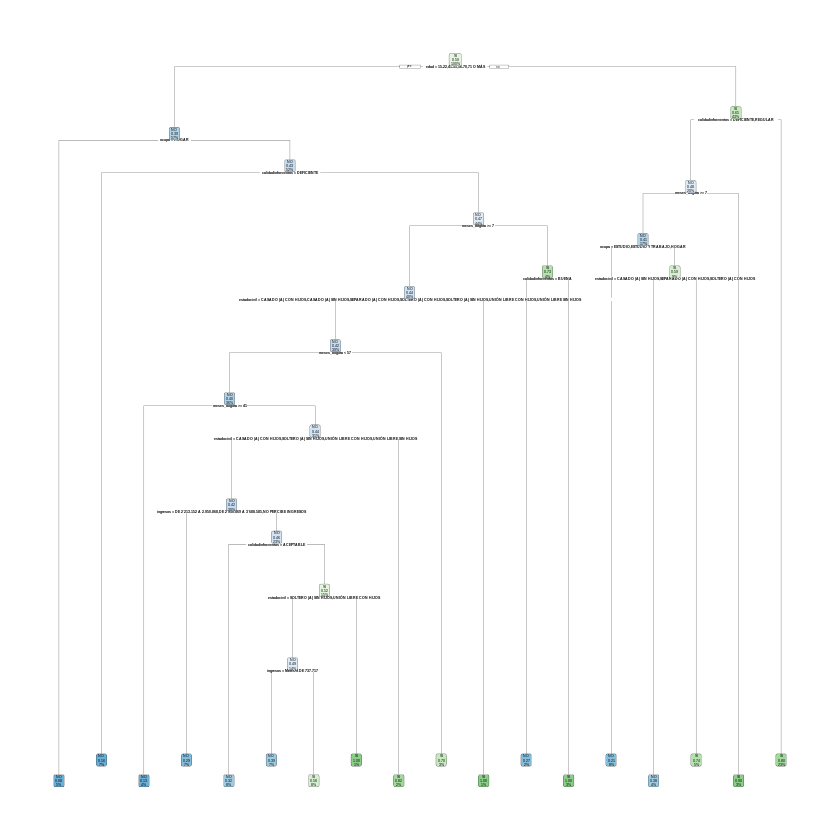

In [ ]:
rpart.plot(tree1)

In [ ]:
pdf("modelo2.pdf")
rpart.plot(tree1)
dev.off()

png 
  2

In [ ]:
summary(tree1)

Call:
rpart(formula = asisteactividad ~ . - educa, data = arb_ent)
  n= 691 

          CP nsplit rel error    xerror       xstd
1 0.24709302      0 1.0000000 1.1453488 0.03782935
2 0.03197674      1 0.7529070 0.7994186 0.03740378
3 0.01744186      4 0.6569767 0.7470930 0.03693295
4 0.01356589      5 0.6395349 0.6976744 0.03638283
5 0.01017442     11 0.5348837 0.6279070 0.03542226
6 0.01000000     17 0.4709302 0.6191860 0.03528631

Variable importance
calidadinfoeventos       meses_bogota               edad        estadocivil 
                20                 19                 17                 16 
             ocupa           ingresos            estrato               sexo 
                14                 11                  2                  1 

Node number 1: 691 observations,    complexity param=0.247093
  predicted class=SI  expected loss=0.4978292  P(node) =1
    class counts:   344   347
   probabilities: 0.498 0.502 
  left son=2 (395 obs) right son=3 (296 obs)
  Primary

In [ ]:
pron<-predict(tree1,newdata=arb_com,type="class")
head(pron)

1  2  3  4  5  6 
NO SI NO NO SI NO 
Levels: NO SI

In [ ]:
confusionMatrix(pron,arb_com[["asisteactividad"]])

Confusion Matrix and Statistics

          Reference
Prediction NO SI
        NO 68 22
        SI 23 60
                                          
               Accuracy : 0.7399          
                 95% CI : (0.6678, 0.8035)
    No Information Rate : 0.526           
    P-Value [Acc > NIR] : 6.429e-09       
                                          
                  Kappa : 0.4787          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7473          
            Specificity : 0.7317          
         Pos Pred Value : 0.7556          
         Neg Pred Value : 0.7229          
             Prevalence : 0.5260          
         Detection Rate : 0.3931          
   Detection Prevalence : 0.5202          
      Balanced Accuracy : 0.7395          
                                          
       'Positive' Class : NO              
                                    

# Modelo 3: Accuracy : 0.7546 , entrenamiento 75%, comprobación 25%

In [ ]:
set.seed(sample(1:1000000,100202,replace=F))
arb_ent<-sample_frac(arb,.75)
arb_com<-sample_frac(arb,.25)
summary(arb_ent)
summary(arb_com)


 asisteactividad  meses_bogota      estrato             sexo           edad    
 NO:324          Min.   : 1.00   Min.   :1.000   FEMENINO :348   15-22   :240  
 SI:324          1st Qu.:18.00   1st Qu.:2.000   MASCULINO:300   23-40   :280  
                 Median :21.00   Median :3.000                   41-55   : 70  
                 Mean   :24.05   Mean   :3.042                   56-70   : 46  
                 3rd Qu.:30.00   3rd Qu.:3.000                   71 O MÁS: 12  
                 Max.   :75.00   Max.   :6.000                                 
                                                                               
                     ingresos                   estadocivil 
 3´688.586 O MÁS         : 28   SOLTERO (A) SIN HIJOS :389  
 DE 1´475.435 A 2´213.151:101   CASADO (A) CON HIJOS  : 94  
 DE 2´213.152 A 2.950.868: 39   SOLTERO (A) CON HIJOS : 52  
 DE 2´950.869 A 3´688.585: 50   UNIÓN LIBRE CON HIJOS : 43  
 DE 737.718 A 1´475.434  :200   CASADO (A) SIN HIJOS  :

 asisteactividad  meses_bogota      estrato             sexo           edad   
 NO: 98          Min.   : 1.00   Min.   :2.000   FEMENINO :117   15-22   :77  
 SI:118          1st Qu.:17.00   1st Qu.:2.000   MASCULINO: 99   23-40   :88  
                 Median :21.00   Median :3.000                   41-55   :23  
                 Mean   :25.21   Mean   :3.079                   56-70   :21  
                 3rd Qu.:30.00   3rd Qu.:3.250                   71 O MÁS: 7  
                 Max.   :75.00   Max.   :6.000                                
                                                                              
                     ingresos                  estadocivil 
 3´688.586 O MÁS         :13   SOLTERO (A) SIN HIJOS :127  
 DE 1´475.435 A 2´213.151:38   CASADO (A) CON HIJOS  : 36  
 DE 2´213.152 A 2.950.868:12   SOLTERO (A) CON HIJOS : 19  
 DE 2´950.869 A 3´688.585:14   SEPARADO (A) CON HIJOS: 11  
 DE 737.718 A 1´475.434  :72   UNIÓN LIBRE CON HIJOS :  8  
 MENOS D

In [ ]:
tree1<-rpart(formula=asisteactividad~ .-educa, data=arb_ent)
tree1

n= 648 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 648 324 NO (0.5000000 0.5000000)  
      2) edad=15-22,41-55,56-70,71 O MÁS 368 140 NO (0.6195652 0.3804348)  
        4) calidadinfoeventos=DEFICIENTE 47   5 NO (0.8936170 0.1063830) *
        5) calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR 321 135 NO (0.5794393 0.4205607)  
         10) ocupa=HOGAR 32   2 NO (0.9375000 0.0625000) *
         11) ocupa=ESTUDIO,ESTUDIO Y TRABAJO,NINGUNO,TRABAJO 289 133 NO (0.5397924 0.4602076)  
           22) meses_bogota>=7.5 262 114 NO (0.5648855 0.4351145)  
             44) estadocivil=CASADO (A) CON HIJOS,CASADO (A) SIN HIJOS,SEPARADO (A) CON HIJOS,SOLTERO (A) CON HIJOS,SOLTERO (A) SIN HIJOS,UNIÓN LIBRE CON HIJOS,UNIÓN LIBRE SIN HIJOS 255 107 NO (0.5803922 0.4196078)  
               88) estadocivil=UNIÓN LIBRE CON HIJOS,UNIÓN LIBRE SIN HIJOS 10   0 NO (1.0000000 0.0000000) *
               89) estadocivil=CASADO (A) CON HIJOS,CASADO (A) SIN HIJOS,SEPA

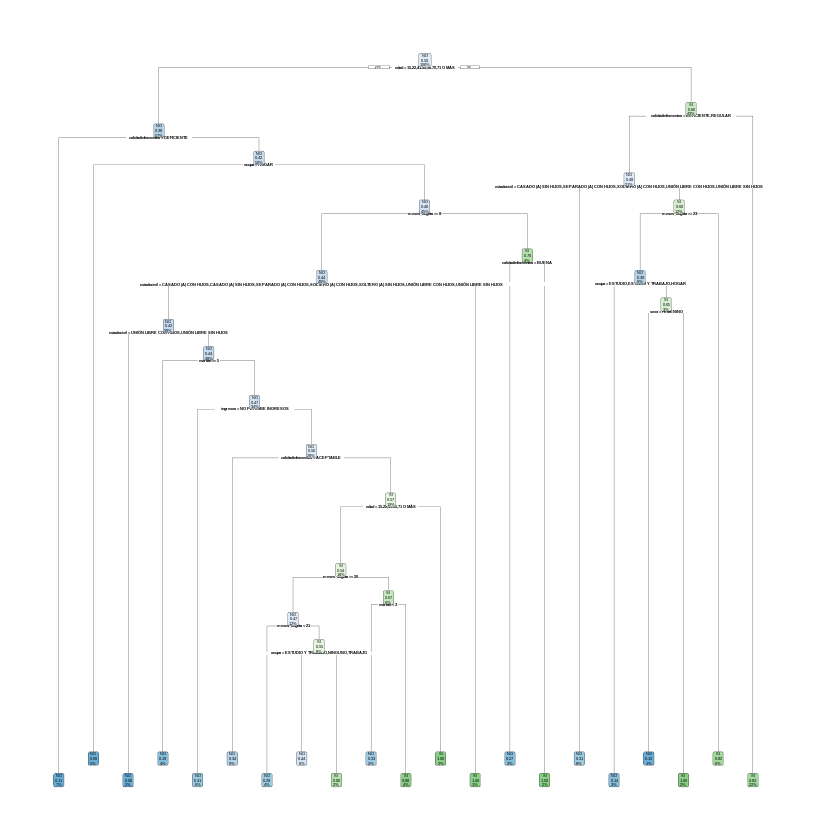

In [ ]:
rpart.plot(tree1)

In [ ]:
pdf("modelo3.pdf")
rpart.plot(tree1)
dev.off()

png 
  2

In [ ]:
summary(tree1)

Call:
rpart(formula = asisteactividad ~ . - educa, data = arb_ent)
  n= 648 

          CP nsplit rel error    xerror       xstd
1 0.27160494      0 1.0000000 1.0802469 0.03915702
2 0.03240741      1 0.7283951 0.7376543 0.03790776
3 0.02777778      3 0.6635802 0.7314815 0.03784100
4 0.01851852      4 0.6358025 0.7067901 0.03755712
5 0.01131687      6 0.5987654 0.6666667 0.03703704
6 0.01000000     20 0.4135802 0.6419753 0.03667968

Variable importance
calidadinfoeventos               edad       meses_bogota              ocupa 
                20                 16                 15                 14 
       estadocivil           ingresos            estrato               sexo 
                13                 11                  8                  4 

Node number 1: 648 observations,    complexity param=0.2716049
  predicted class=NO  expected loss=0.5  P(node) =1
    class counts:   324   324
   probabilities: 0.500 0.500 
  left son=2 (368 obs) right son=3 (280 obs)
  Primary spli

In [ ]:
pron<-predict(tree1,newdata=arb_com,type="class")
head(pron)

1  2  3  4  5  6 
SI SI SI SI SI SI 
Levels: NO SI

In [ ]:
confusionMatrix(pron,arb_com[["asisteactividad"]])

Confusion Matrix and Statistics

          Reference
Prediction NO SI
        NO 83 38
        SI 15 80
                                          
               Accuracy : 0.7546          
                 95% CI : (0.6917, 0.8105)
    No Information Rate : 0.5463          
    P-Value [Acc > NIR] : 1.939e-10       
                                          
                  Kappa : 0.5147          
                                          
 Mcnemar's Test P-Value : 0.002512        
                                          
            Sensitivity : 0.8469          
            Specificity : 0.6780          
         Pos Pred Value : 0.6860          
         Neg Pred Value : 0.8421          
             Prevalence : 0.4537          
         Detection Rate : 0.3843          
   Detection Prevalence : 0.5602          
      Balanced Accuracy : 0.7625          
                                          
       'Positive' Class : NO              
                                    

# Modelo 4: Accuracy : 0.7854 , entrenamiento 73%, comprobación 27%

In [ ]:
set.seed(sample(1:1000000,100202,replace=F))
arb_ent<-sample_frac(arb,.73)
arb_com<-sample_frac(arb,.27)
summary(arb_ent)
summary(arb_com)


 asisteactividad  meses_bogota      estrato             sexo           edad    
 NO:306          Min.   : 1.00   Min.   :1.000   FEMENINO :345   15-22   :230  
 SI:325          1st Qu.:18.00   1st Qu.:2.000   MASCULINO:286   23-40   :286  
                 Median :21.00   Median :3.000                   41-55   : 67  
                 Mean   :23.68   Mean   :2.992                   56-70   : 42  
                 3rd Qu.:29.00   3rd Qu.:3.000                   71 O MÁS:  6  
                 Max.   :75.00   Max.   :6.000                                 
                                                                               
                     ingresos                   estadocivil 
 3´688.586 O MÁS         : 30   SOLTERO (A) SIN HIJOS :377  
 DE 1´475.435 A 2´213.151:105   CASADO (A) CON HIJOS  : 86  
 DE 2´213.152 A 2.950.868: 40   SOLTERO (A) CON HIJOS : 58  
 DE 2´950.869 A 3´688.585: 40   UNIÓN LIBRE CON HIJOS : 46  
 DE 737.718 A 1´475.434  :205   CASADO (A) SIN HIJOS  :

 asisteactividad  meses_bogota      estrato             sexo           edad    
 NO:119          Min.   : 1.00   Min.   :1.000   FEMENINO :123   15-22   : 74  
 SI:114          1st Qu.:18.00   1st Qu.:2.000   MASCULINO:110   23-40   :117  
                 Median :21.00   Median :3.000                   41-55   : 24  
                 Mean   :23.91   Mean   :3.103                   56-70   : 15  
                 3rd Qu.:29.00   3rd Qu.:4.000                   71 O MÁS:  3  
                 Max.   :70.00   Max.   :6.000                                 
                                                                               
                     ingresos                  estadocivil 
 3´688.586 O MÁS         :13   SOLTERO (A) SIN HIJOS :137  
 DE 1´475.435 A 2´213.151:35   CASADO (A) CON HIJOS  : 38  
 DE 2´213.152 A 2.950.868:22   SOLTERO (A) CON HIJOS : 19  
 DE 2´950.869 A 3´688.585:16   UNIÓN LIBRE CON HIJOS : 16  
 DE 737.718 A 1´475.434  :75   UNIÓN LIBRE SIN HIJOS :  8  


In [ ]:
tree1<-rpart(formula=asisteactividad~ .-educa, data=arb_ent)
tree1

n= 631 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 631 306 SI (0.4849445 0.5150555)  
   2) edad=15-22,41-55,56-70 339 133 NO (0.6076696 0.3923304)  
     4) calidadinfoeventos=BUENA,DEFICIENTE 105  24 NO (0.7714286 0.2285714)  
       8) ingresos=3´688.586 O MÁS,DE 1´475.435 A 2´213.151,DE 2´213.152 A 2.950.868,MENOS DE 737.717,NO PERCIBE INGRESOS 70   8 NO (0.8857143 0.1142857) *
       9) ingresos=DE 2´950.869 A 3´688.585,DE 737.718 A 1´475.434 35  16 NO (0.5428571 0.4571429)  
        18) ocupa=HOGAR,TRABAJO 22   6 NO (0.7272727 0.2727273) *
        19) ocupa=ESTUDIO,ESTUDIO Y TRABAJO,NINGUNO 13   3 SI (0.2307692 0.7692308) *
     5) calidadinfoeventos=ACEPTABLE,EXCELENTE,REGULAR 234 109 NO (0.5341880 0.4658120)  
      10) meses_bogota>=7.5 217  92 NO (0.5760369 0.4239631)  
        20) ingresos=DE 2´213.152 A 2.950.868,DE 2´950.869 A 3´688.585,DE 737.718 A 1´475.434,NO PERCIBE INGRESOS 123  39 NO (0.6829268 0.3170732) *
        21) ingresos=3´68

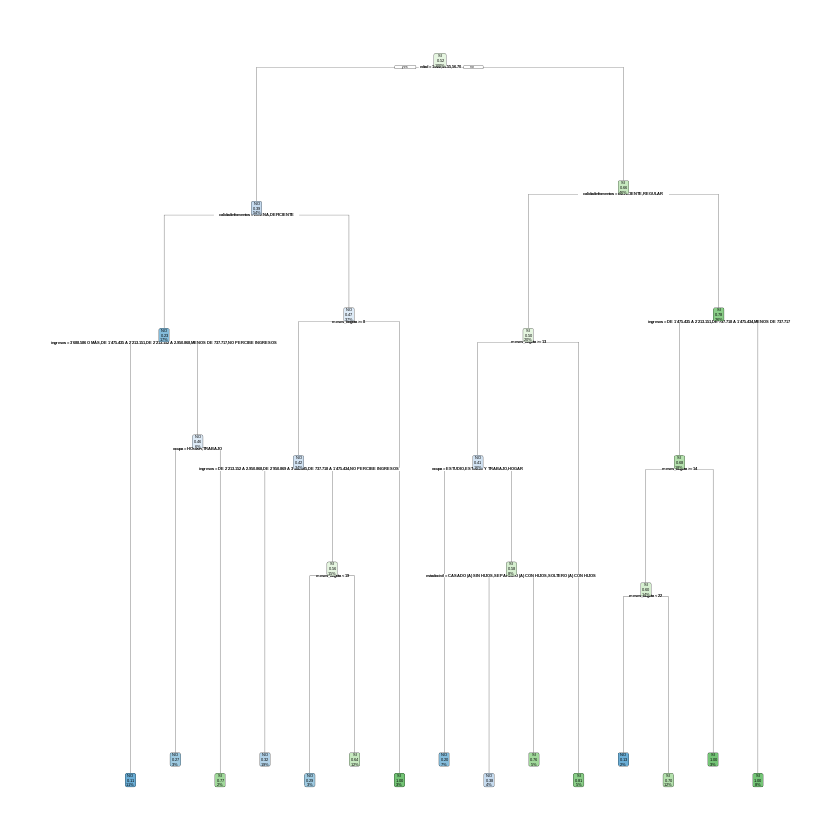

In [ ]:
rpart.plot(tree1)

In [ ]:
pdf("modelo4.pdf")
rpart.plot(tree1)
dev.off()

png 
  2

In [ ]:
summary(tree1)

Call:
rpart(formula = asisteactividad ~ . - educa, data = arb_ent)
  n= 631 

          CP nsplit rel error    xerror       xstd
1 0.23856209      0 1.0000000 1.0000000 0.04102667
2 0.02941176      1 0.7614379 0.7614379 0.03961716
3 0.02777778      4 0.6732026 0.7712418 0.03972084
4 0.01960784      8 0.5490196 0.7450980 0.03943518
5 0.01198257      9 0.5294118 0.7156863 0.03907820
6 0.01143791     12 0.4934641 0.6666667 0.03839661
7 0.01000000     14 0.4705882 0.6013072 0.03731011

Variable importance
      meses_bogota           ingresos               edad calidadinfoeventos 
                29                 17                 15                 13 
             ocupa        estadocivil            estrato               sexo 
                11                 10                  4                  1 

Node number 1: 631 observations,    complexity param=0.2385621
  predicted class=SI  expected loss=0.4849445  P(node) =1
    class counts:   306   325
   probabilities: 0.485 0.515 
  

In [ ]:
pron<-predict(tree1,newdata=arb_com,type="class")
head(pron)

1  2  3  4  5  6 
NO NO SI SI SI NO 
Levels: NO SI

In [ ]:
confusionMatrix(pron,arb_com[["asisteactividad"]])

Confusion Matrix and Statistics

          Reference
Prediction NO SI
        NO 92 23
        SI 27 91
                                          
               Accuracy : 0.7854          
                 95% CI : (0.7271, 0.8363)
    No Information Rate : 0.5107          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5709          
                                          
 Mcnemar's Test P-Value : 0.6714          
                                          
            Sensitivity : 0.7731          
            Specificity : 0.7982          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.7712          
             Prevalence : 0.5107          
         Detection Rate : 0.3948          
   Detection Prevalence : 0.4936          
      Balanced Accuracy : 0.7857          
                                          
       'Positive' Class : NO              
                                    

# Modelo 5: Accuracy : 0.809 , entrenamiento 77%, comprobación 23%

In [ ]:
set.seed(sample(1:1000000,100202,replace=F))
arb_ent<-sample_frac(arb,.77)
arb_com<-sample_frac(arb,.23)
summary(arb_ent)
summary(arb_com)


 asisteactividad  meses_bogota     estrato             sexo           edad    
 NO:331          Min.   : 1.0   Min.   :1.000   FEMENINO :368   15-22   :240  
 SI:334          1st Qu.:18.0   1st Qu.:2.000   MASCULINO:297   23-40   :287  
                 Median :21.0   Median :3.000                   41-55   : 76  
                 Mean   :24.5   Mean   :3.026                   56-70   : 51  
                 3rd Qu.:30.0   3rd Qu.:3.000                   71 O MÁS: 11  
                 Max.   :75.0   Max.   :6.000                                 
                                                                              
                     ingresos                   estadocivil 
 3´688.586 O MÁS         : 31   SOLTERO (A) SIN HIJOS :388  
 DE 1´475.435 A 2´213.151:110   CASADO (A) CON HIJOS  : 97  
 DE 2´213.152 A 2.950.868: 43   SOLTERO (A) CON HIJOS : 54  
 DE 2´950.869 A 3´688.585: 48   UNIÓN LIBRE CON HIJOS : 47  
 DE 737.718 A 1´475.434  :211   SEPARADO (A) CON HIJOS: 24  
 M

 asisteactividad  meses_bogota      estrato             sexo           edad   
 NO:108          Min.   : 1.00   Min.   :1.000   FEMENINO :113   15-22   :77  
 SI: 91          1st Qu.:13.00   1st Qu.:2.000   MASCULINO: 86   23-40   :95  
                 Median :20.00   Median :3.000                   41-55   :16  
                 Mean   :21.82   Mean   :2.864                   56-70   :11  
                 3rd Qu.:28.00   3rd Qu.:3.000                   71 O MÁS: 0  
                 Max.   :70.00   Max.   :6.000                                
                                                                              
                     ingresos                  estadocivil 
 3´688.586 O MÁS         : 7   SOLTERO (A) SIN HIJOS :126  
 DE 1´475.435 A 2´213.151:35   CASADO (A) CON HIJOS  : 24  
 DE 2´213.152 A 2.950.868:12   UNIÓN LIBRE CON HIJOS : 16  
 DE 2´950.869 A 3´688.585: 8   SOLTERO (A) CON HIJOS : 15  
 DE 737.718 A 1´475.434  :70   SEPARADO (A) CON HIJOS:  9  
 MENOS D

In [ ]:
tree1<-rpart(formula=asisteactividad~ .-educa, data=arb_ent)
tree1

n= 665 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 665 331 SI (0.49774436 0.50225564)  
      2) calidadinfoeventos=DEFICIENTE 78  12 NO (0.84615385 0.15384615) *
      3) calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR 587 265 SI (0.45144804 0.54855196)  
        6) edad=15-22,41-55,56-70,71 O MÁS 325 141 NO (0.56615385 0.43384615)  
         12) ocupa=HOGAR 33   3 NO (0.90909091 0.09090909) *
         13) ocupa=ESTUDIO,ESTUDIO Y TRABAJO,NINGUNO,TRABAJO 292 138 NO (0.52739726 0.47260274)  
           26) meses_bogota>=8.5 258 113 NO (0.56201550 0.43798450)  
             52) estadocivil=CASADO (A) CON HIJOS,CASADO (A) SIN HIJOS,SEPARADO (A) CON HIJOS,SOLTERO (A) CON HIJOS,SOLTERO (A) SIN HIJOS,UNIÓN LIBRE CON HIJOS,UNIÓN LIBRE SIN HIJOS 251 106 NO (0.57768924 0.42231076)  
              104) estadocivil=UNIÓN LIBRE CON HIJOS,UNIÓN LIBRE SIN HIJOS 11   0 NO (1.00000000 0.00000000) *
              105) estadocivil=CASADO (A) CON HIJOS,CASADO (A

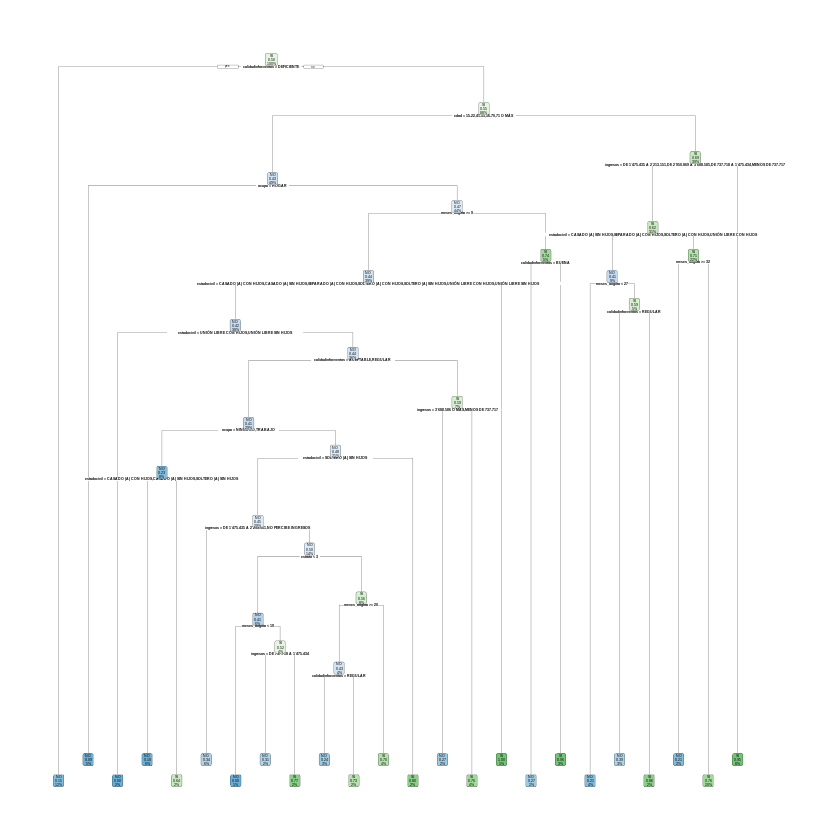

In [ ]:
rpart.plot(tree1)

In [ ]:
pdf("modelo5-1.pdf")
rpart.plot(tree1)
dev.off()

png 
  2

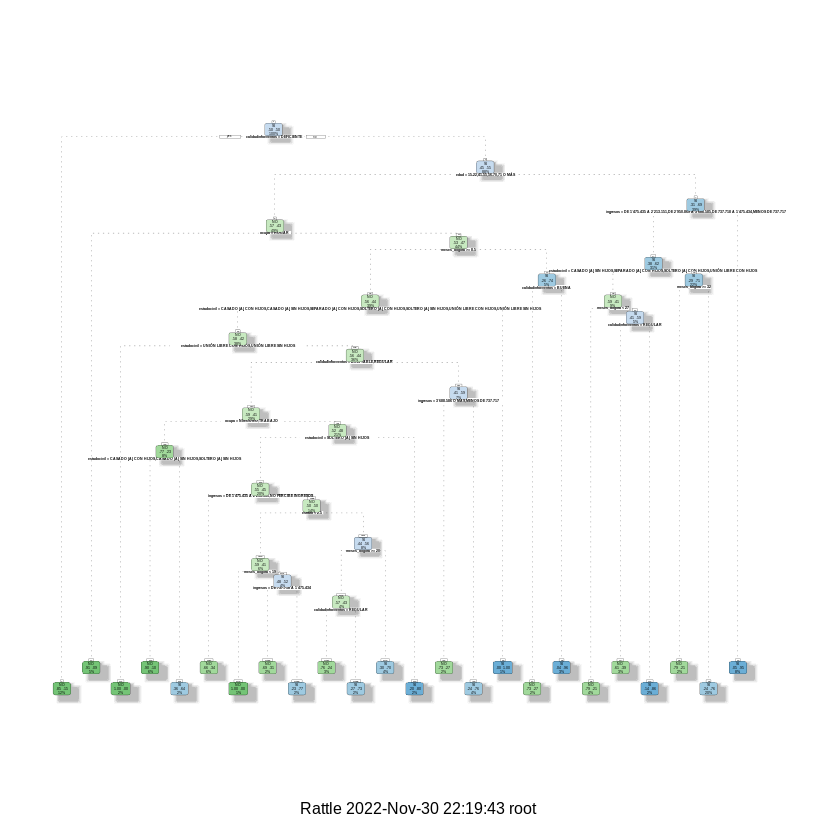

In [ ]:
fancyRpartPlot(tree1) #Da un árbol más bonito y creo que útil

In [ ]:
pdf("modelo5-2.pdf")
fancyRpartPlot(tree1)
dev.off()

png 
  2

In [ ]:
asRules(tree1) #Código que da el árbol como reglas ordenadas


 Rule number: 53 [asisteactividad=SI cover=7 (1%) prob=1.00]
   calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR
   edad=15-22,41-55,56-70,71 O MÁS
   ocupa=ESTUDIO,ESTUDIO Y TRABAJO,NINGUNO,TRABAJO
   meses_bogota>=8.5
   estadocivil=SEPARADO (A) SIN HIJOS,VIUDO (A) CON HIJOS

 Rule number: 55 [asisteactividad=SI cover=23 (3%) prob=0.96]
   calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR
   edad=15-22,41-55,56-70,71 O MÁS
   ocupa=ESTUDIO,ESTUDIO Y TRABAJO,NINGUNO,TRABAJO
   meses_bogota< 8.5
   calidadinfoeventos=ACEPTABLE,REGULAR

 Rule number: 15 [asisteactividad=SI cover=56 (8%) prob=0.95]
   calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR
   edad=23-40
   ingresos=3´688.586 O MÁS,DE 2´213.152 A 2.950.868,NO PERCIBE INGRESOS

 Rule number: 115 [asisteactividad=SI cover=14 (2%) prob=0.86]
   calidadinfoeventos=ACEPTABLE,BUENA,EXCELENTE,REGULAR
   edad=23-40
   ingresos=DE 1´475.435 A 2´213.151,DE 2´950.869 A 3´688.585,DE 737.718 A 1´475.434,MENOS DE 737.717
   estado

In [ ]:
summary(tree1)

Call:
rpart(formula = asisteactividad ~ . - educa, data = arb_ent)
  n= 665 

          CP nsplit rel error    xerror       xstd
1 0.16314199      0 1.0000000 1.1087613 0.03874381
2 0.12990937      1 0.8368580 0.9154079 0.03880045
3 0.02416918      2 0.7069486 0.8066465 0.03819076
4 0.02114804      4 0.6586103 0.7039275 0.03716901
5 0.01661631      5 0.6374622 0.7099698 0.03724169
6 0.01510574      9 0.5619335 0.6918429 0.03701879
7 0.01208459     10 0.5468278 0.6827795 0.03690181
8 0.01007049     14 0.4894260 0.6435045 0.03635132
9 0.01000000     23 0.3897281 0.5951662 0.03557273

Variable importance
calidadinfoeventos       meses_bogota        estadocivil           ingresos 
                20                 19                 18                 15 
              edad              ocupa            estrato               sexo 
                14                 11                  4                  1 

Node number 1: 665 observations,    complexity param=0.163142
  predicted class=SI

In [ ]:
pron<-predict(tree1,newdata=arb_com,type="class")
head(pron)

1  2  3  4  5  6 
NO NO NO SI NO NO 
Levels: NO SI

In [ ]:
confusionMatrix(pron,arb_com[["asisteactividad"]])

Confusion Matrix and Statistics

          Reference
Prediction NO SI
        NO 88 18
        SI 20 73
                                          
               Accuracy : 0.809           
                 95% CI : (0.7475, 0.8612)
    No Information Rate : 0.5427          
    P-Value [Acc > NIR] : 3.089e-15       
                                          
                  Kappa : 0.6159          
                                          
 Mcnemar's Test P-Value : 0.8711          
                                          
            Sensitivity : 0.8148          
            Specificity : 0.8022          
         Pos Pred Value : 0.8302          
         Neg Pred Value : 0.7849          
             Prevalence : 0.5427          
         Detection Rate : 0.4422          
   Detection Prevalence : 0.5327          
      Balanced Accuracy : 0.8085          
                                          
       'Positive' Class : NO              
                                    